# **Análisis de canciones: Predicción del género musical**

# Proyecto de Machine Learning y Deep Learning

## PARTE IV: Red Neuronal

### by Marta Buesa

#### Febrero 2022 

![MartaBuesaProyectoML](portada_ML.png)

# 1. Importo librerias

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. Importo datasets
## TRAIN

### X_train NO estandarizado

In [92]:
X_train = pd.read_csv('csvs/X_train_modified.csv')
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_train.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,26.0,0.148000,0.481,345253.0,0.776,-1.493326,-0.329894,-8.404,1.000000,0.0388,...,1,0,0,0,0,0,0,0,0,0
1,21.0,0.960000,0.242,480013.0,0.113,-0.167240,-2.180367,-21.232,0.179818,0.0349,...,0,0,0,0,0,0,1,0,0,0
2,47.0,0.328000,0.798,219960.0,0.538,-3.868285,-1.703749,-11.412,0.179818,0.0363,...,0,0,0,0,0,0,0,0,1,0
3,39.0,0.031800,0.573,219019.0,0.743,-1.493326,-1.883875,-6.047,1.000000,0.0374,...,0,0,0,0,0,0,0,0,1,0
4,58.0,0.000006,0.427,265640.0,0.906,-0.207082,-1.777857,-3.488,0.179818,0.0472,...,0,0,1,0,0,0,0,0,0,0
5,29.0,0.001180,0.410,225093.0,0.988,-2.062738,-1.164752,-2.381,1.000000,0.1410,...,0,0,0,0,0,0,0,1,0,0
6,30.0,0.004140,0.624,251000.0,0.605,-4.371529,-2.154165,-7.900,0.179818,0.0313,...,0,0,0,0,0,0,0,0,0,0
7,28.0,0.001980,0.481,202707.0,0.956,-1.493326,-1.111698,-4.094,0.179818,0.0509,...,0,0,0,0,0,0,0,0,0,0
8,57.0,0.097600,0.921,234787.0,0.480,-1.493326,-2.566551,-9.200,1.000000,0.0823,...,0,0,0,0,0,0,0,0,0,0
9,52.0,0.000690,0.497,230513.0,0.956,-5.387271,-1.754464,-4.383,1.000000,0.0445,...,0,0,0,0,0,0,0,0,1,0


### X_train estandarizado

In [93]:
X_train_scal = pd.read_csv('csvs/X_train_modified_and_scaled.csv')
X_train_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_train_scal.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,-1.181905,-0.460124,-0.443239,1.288685,0.659647,0.525620,2.361115,0.109311,1.342698,-0.541965,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
1,-1.504704,1.925870,-1.789203,2.919348,-1.853332,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344
2,0.173848,0.068791,1.341994,-0.227422,-0.242448,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
3,-0.342630,-0.801568,0.074873,-0.238809,0.534566,0.525620,0.006656,0.497551,1.342698,-0.555777,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
4,0.884005,-0.894991,-0.747348,0.325328,1.152388,1.249039,0.167285,0.919065,-0.744769,-0.459096,...,-0.307488,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
5,-0.988226,-0.891543,-0.843086,-0.165311,1.463193,0.205367,1.096209,1.101408,1.342698,0.466274,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
6,-0.923667,-0.882845,0.362087,0.148177,0.011503,-1.093161,-0.402865,0.192329,-0.744769,-0.615956,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-1.052786,-0.889192,-0.443239,-0.436192,1.341903,0.525620,1.176593,0.819246,-0.744769,-0.422594,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,0.819445,-0.608220,2.034687,-0.048008,-0.462287,0.525620,-1.027677,-0.021805,1.342698,-0.112822,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
9,0.496646,-0.892982,-0.353132,-0.099726,1.341903,-1.664443,0.202728,0.771642,1.342698,-0.485733,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_train con label encoder

In [94]:
y_train = pd.read_csv('csvs/y_train_transformed.csv')
#y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_train.head(10)

,music_genre
0,2
1,3
2,2
3,4
4,0
5,2
6,5
7,1
8,0
9,0


In [95]:
print(X_train.shape)
print(X_train_scal.shape)
print(y_train.shape)

(39719, 23)
(39719, 23)
(39719, 1)


## TEST

### X_test NO standarizado

In [96]:
X_test = pd.read_csv('csvs/X_test_modified.csv')
X_test.drop(columns=['Unnamed: 0'], inplace=True)
X_test.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,60.0,0.9150,0.487,219019.0,0.135,-3.636274,-0.376878,-11.211,1,0.0434,...,0,0,0,0,0,1,0,0,0,0
1,33.0,0.0169,0.483,158067.0,0.903,-2.310026,-2.162823,-5.767,1,0.0738,...,0,0,0,0,0,0,0,0,0,0
2,36.0,0.6380,0.396,314800.0,0.380,-0.176439,-2.198225,-12.908,1,0.0429,...,0,0,0,0,1,0,0,0,0,0
3,63.0,0.8340,0.518,196493.0,0.543,-1.489131,-1.609438,-10.766,0,0.0297,...,0,0,0,0,0,0,0,0,0,0
4,72.0,0.0996,0.715,130929.0,0.617,-5.206685,-1.682009,-5.558,1,0.2400,...,0,0,0,0,0,0,0,1,0,0
5,59.0,0.1800,0.595,220133.0,0.427,-5.026046,-2.111965,-6.764,1,0.0540,...,1,0,0,0,0,0,0,0,0,0
6,36.0,0.4500,0.447,380933.0,0.843,-2.076720,-2.570465,-6.657,1,0.0860,...,1,0,0,0,0,0,0,0,0,0
7,33.0,0.0247,0.794,301977.0,0.685,-2.958689,-1.555897,-5.294,1,0.0779,...,0,0,0,0,1,0,0,0,0,0
8,40.0,0.0246,0.536,218040.0,0.598,-3.606730,-0.673345,-6.266,0,0.0279,...,0,0,0,0,0,0,0,0,1,0
9,54.0,0.1890,0.512,304427.0,0.543,-4.202528,-1.130103,-6.857,0,0.0343,...,0,0,0,0,0,0,0,0,1,0


### X_test estandarizado

In [97]:
X_test_scal = pd.read_csv('csvs/X_test_modified_and_scaled.csv')
X_test_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_test_scal.head(10)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,1.013124,1.793641,-0.409449,-0.238809,-1.769945,-0.679633,2.289930,-0.353053,1.342698,-0.496585,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344
1,-0.729988,-0.845351,-0.431976,-0.976358,1.141017,0.066285,-0.415983,0.543672,1.342698,-0.196678,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
2,-0.536309,0.979700,-0.921929,0.920189,-0.841318,1.266274,-0.469621,-0.632580,1.342698,-0.501517,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
3,1.206803,1.555630,-0.234868,-0.511385,-0.223497,0.527979,0.422459,-0.279753,-1.202430,-0.631740,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
4,1.787840,-0.602344,0.874567,-1.304742,0.056987,-1.562876,0.312506,0.578098,1.342698,1.442945,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
5,0.948564,-0.366095,0.198769,-0.225329,-0.663173,-1.461280,-0.338927,0.379448,1.342698,-0.392012,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
6,-0.536309,0.427278,-0.634715,1.720431,0.913598,0.197503,-1.033607,0.397073,1.342698,-0.076320,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-0.729988,-0.822431,1.319468,0.765024,0.314728,-0.298540,0.503579,0.621584,1.342698,-0.156230,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,-0.278070,-0.822725,-0.133498,-0.250655,-0.015029,-0.663017,1.840748,0.461478,-1.202430,-0.649498,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
9,0.625766,-0.339649,-0.268658,0.794670,-0.223497,-0.998110,1.148707,0.364130,-1.202430,-0.586359,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_test con label encoder

In [98]:
y_test = pd.read_csv('csvs/y_test_transformed.csv')
y_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test.head(10)

,music_genre
0,7
1,2
2,7
3,9
4,6
5,8
6,7
7,5
8,4
9,9


In [99]:
print(X_test.shape)
print(X_test_scal.shape)
print(y_test.shape)

(9943, 23)
(9943, 23)
(9943, 1)


### Generos_musicales 

* 'Alternative': 0
* 'Anime': 1 
* 'Blues': 2 
* 'Classical': 3
* 'Country': 4
* 'Electronic': 5 
* 'Hip-Hop': 6
* 'Jazz': 7
* 'Rap': 8
* 'Rock': 9

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [101]:
def mostrar_resultados(muestra, truee, pred):
    '''
    Función que muestra los resultados del modelo: matriz de confusión y reporte de aciertos en laclasificación entre los generos musicales
    '''
    c_matrix = confusion_matrix(truee, pred)
    plt.figure(figsize=(15,10))
    if muestra == 'TRAIN':
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Blues');
    else:
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Greens');
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(truee, pred))

## 3.9. Red Neuronal: Multilayer Perceptron Classifier

### Importo librerias necesarias

In [102]:
from sklearn.neural_network import MLPClassifier


### Preparo y entreno modelo MultiLayer Perceptron Classifier

#### OPCION 1: con parametros por defecto de funcion de activación 'relu' y optimizador a utilizar para el cálculo del mínimo de la función de coste 'adam'

In [103]:
# Por defecto funcion activacion es'relu'y solver 'adam'
mlp1 = MLPClassifier(max_iter=500)

# Entreno neuronas
mlp1.fit(X_train_scal, y_train)

print(mlp1.score(X_train_scal, y_train))
print(mlp1.score(X_test_scal, y_test))

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6237568921674765
0.5758825304234134


#### OPCION 2:  pongo distinto optimizador 'descenso de gradiente estocástico', e incluyo 2 capas de 150 y 100 neuronas

In [104]:
mlp2 = MLPClassifier(max_iter=500,
                   activation='relu',
                   solver='sgd',
                   hidden_layer_sizes = (150, 100))

# Entreno neuronas
mlp2.fit(X_train_scal, y_train)

print(mlp2.score(X_train_scal, y_train))
print(mlp2.score(X_test_scal, y_test))

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.6445278078501473
0.5741727848737805


#### OPCION 3: Cambio funcion de activación a la tangente hiperbólica, con el descenso de gradiente estocastico y de nuevo 2 capas de neuronas

In [105]:
mlp3 = MLPClassifier(max_iter=500,
                   activation='tanh',
                   solver='sgd',
                   hidden_layer_sizes = (150, 100))

# Entreno neuronas
mlp3.fit(X_train_scal, y_train)

print(mlp3.score(X_train_scal, y_train))
print(mlp3.score(X_test_scal, y_test))

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.6239583071074297
0.5811123403399376


In [106]:
train_predic1 = mlp1.predict(X_train_scal)
train_predic2 = mlp2.predict(X_train_scal)
train_predic3 = mlp3.predict(X_train_scal)

### Predicción sobre TEST

#### OPCIÓN 1

Resultados MultiLayer Perceptron Classifier en TEST:


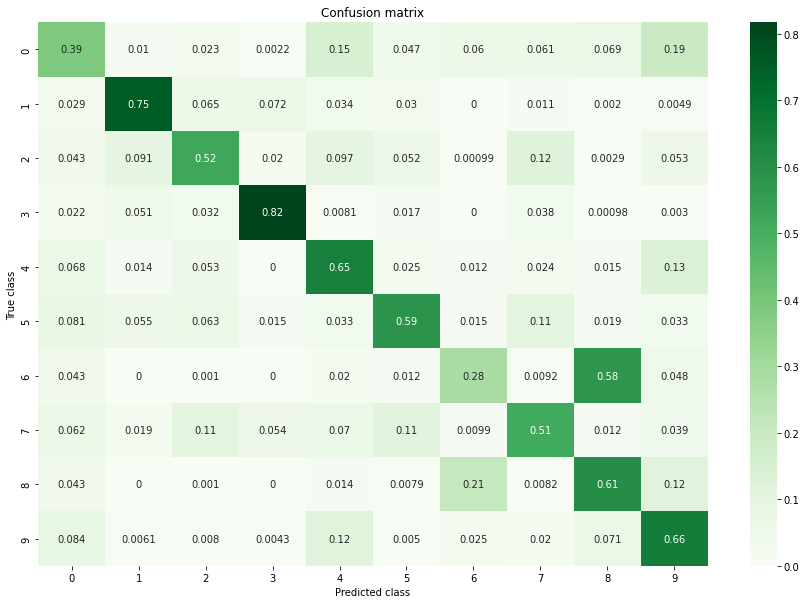

              precision    recall  f1-score   support

           0       0.45      0.39      0.42      1002
           1       0.75      0.75      0.75       987
           2       0.60      0.52      0.56      1000
           3       0.83      0.82      0.82       930
           4       0.54      0.65      0.59       986
           5       0.66      0.59      0.62      1008
           6       0.46      0.28      0.35      1015
           7       0.56      0.51      0.54       981
           8       0.44      0.61      0.51      1023
           9       0.51      0.66      0.58      1011

    accuracy                           0.58      9943
   macro avg       0.58      0.58      0.57      9943
weighted avg       0.58      0.58      0.57      9943



In [107]:
test_predic1 = mlp1.predict(X_test_scal)
# Prediccion en TEST
print('Resultados MultiLayer Perceptron Classifier en TEST:')
mostrar_resultados('TEST', y_test, test_predic1)

In [108]:
acierto = accuracy_score(y_test, test_predic1)
error = 1 - acierto

print('Score Logistic MultiLayer Perceptron Classifier en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Logistic MultiLayer Perceptron Classifier en TEST:
-----------------------------
Accuracy test: 57.59 %
Error test: 42.41 %


#### OPCIÓN 2

Resultados MultiLayer Perceptron Classifier en TEST:


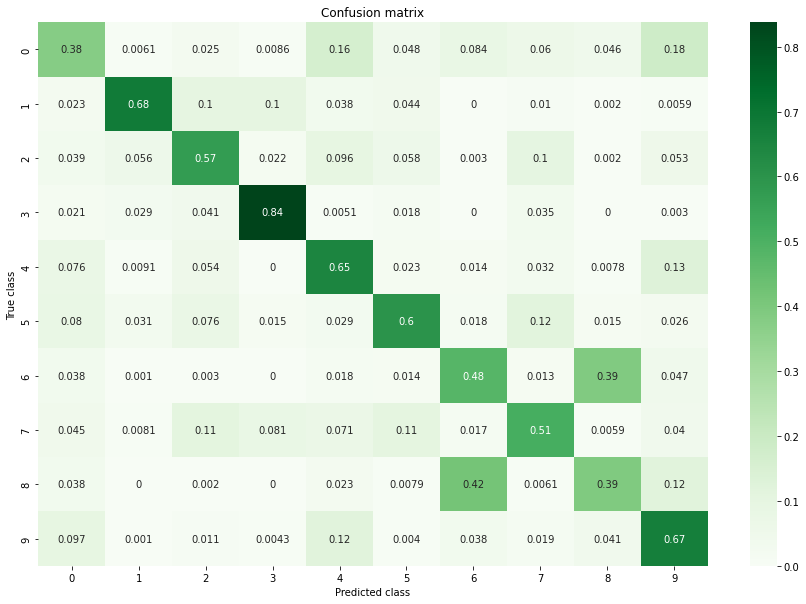

              precision    recall  f1-score   support

           0       0.45      0.38      0.41      1002
           1       0.83      0.68      0.75       987
           2       0.58      0.57      0.57      1000
           3       0.78      0.84      0.81       930
           4       0.54      0.65      0.59       986
           5       0.65      0.60      0.62      1008
           6       0.45      0.48      0.46      1015
           7       0.56      0.51      0.54       981
           8       0.44      0.39      0.41      1023
           9       0.52      0.67      0.59      1011

    accuracy                           0.57      9943
   macro avg       0.58      0.58      0.58      9943
weighted avg       0.58      0.57      0.57      9943



In [109]:
test_predic2 = mlp2.predict(X_test_scal)
# Prediccion en TEST
print('Resultados MultiLayer Perceptron Classifier en TEST:')
mostrar_resultados('TEST', y_test, test_predic2)

In [110]:
acierto = accuracy_score(y_test, test_predic2)
error = 1 - acierto

print('Score Logistic MultiLayer Perceptron Classifier en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Logistic MultiLayer Perceptron Classifier en TEST:
-----------------------------
Accuracy test: 57.42 %
Error test: 42.58 %


#### OPCIÓN 3

Resultados MultiLayer Perceptron Classifier en TEST:


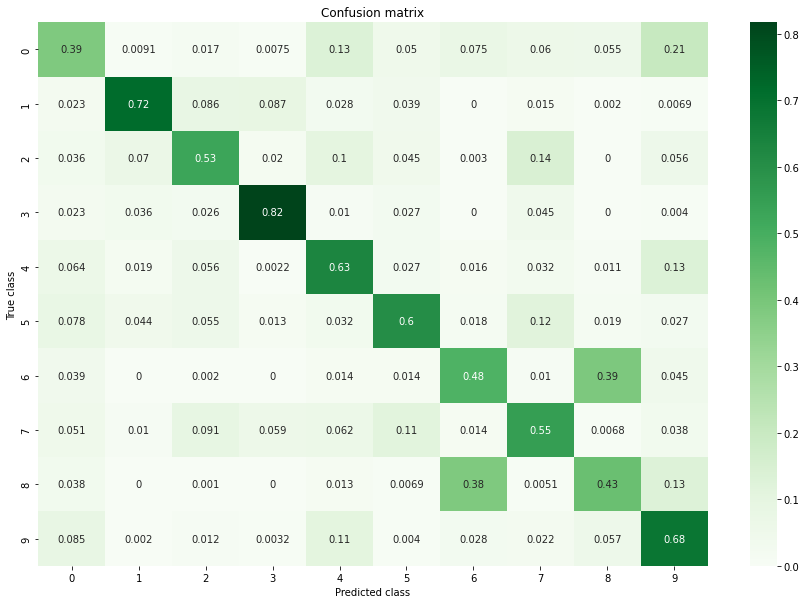

              precision    recall  f1-score   support

           0       0.47      0.39      0.42      1002
           1       0.79      0.72      0.75       987
           2       0.60      0.53      0.56      1000
           3       0.81      0.82      0.81       930
           4       0.56      0.63      0.59       986
           5       0.65      0.60      0.63      1008
           6       0.47      0.48      0.48      1015
           7       0.55      0.55      0.55       981
           8       0.44      0.43      0.44      1023
           9       0.51      0.68      0.59      1011

    accuracy                           0.58      9943
   macro avg       0.59      0.58      0.58      9943
weighted avg       0.58      0.58      0.58      9943



In [111]:
test_predic3 = mlp3.predict(X_test_scal)
# Prediccion en TEST
print('Resultados MultiLayer Perceptron Classifier en TEST:')
mostrar_resultados('TEST', y_test, test_predic3)

In [112]:
acierto = accuracy_score(y_test, test_predic3)
error = 1 - acierto

print('Score Logistic MultiLayer Perceptron Classifier en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Logistic MultiLayer Perceptron Classifier en TEST:
-----------------------------
Accuracy test: 58.11 %
Error test: 41.89 %


### Guardo CSV con resultados obtenidos en Perceptron Model red neuronal en TEST

In [113]:
results_perceptron1 = pd.DataFrame(classification_report(y_true = y_test, y_pred = test_predic1,output_dict=True)).transpose()

results_perceptron1 = results_perceptron.add_prefix('Perceptron_OP1_')

results_perceptron1

,Perceptron_OP1_Perceptron_OP1_Perceptron_OP1_precision,Perceptron_OP1_Perceptron_OP1_Perceptron_OP1_recall,Perceptron_OP1_Perceptron_OP1_Perceptron_OP1_f1-score,Perceptron_OP1_Perceptron_OP2_precision,Perceptron_OP1_Perceptron_OP2_recall,Perceptron_OP1_Perceptron_OP2_f1-score,Perceptron_OP1_Perceptron_OP3_precision,Perceptron_OP1_Perceptron_OP3_recall,Perceptron_OP1_Perceptron_OP3_f1-score
0,0.478488,0.370333,0.417520,0.439850,0.350299,0.390000,0.445476,0.383234,0.412017
1,0.782320,0.723187,0.751592,0.810069,0.717325,0.760881,0.794843,0.718338,0.754657
2,0.597388,0.550652,0.573069,0.578288,0.554000,0.565884,0.605178,0.561000,0.582252
3,0.846071,0.833510,0.839744,0.826695,0.825806,0.826251,0.814894,0.823656,0.819251
4,0.575985,0.578154,0.577068,0.535593,0.640974,0.583564,0.559041,0.614604,0.585507
5,0.619620,0.644792,0.631955,0.632674,0.603175,0.617572,0.652406,0.605159,0.627895
6,0.440590,0.517312,0.475878,0.452519,0.539901,0.492363,0.459750,0.506404,0.481950
7,0.575556,0.511352,0.541558,0.553863,0.518858,0.535789,0.557003,0.522936,0.539432
8,0.437863,0.380424,0.407127,0.443128,0.365591,0.400643,0.442222,0.389052,0.413937
9,0.488744,0.702505,0.576445,0.527187,0.661721,0.586842,0.516862,0.697329,0.593684


In [114]:
results_perceptron2 = pd.DataFrame(classification_report(y_true = y_test, y_pred = test_predic2,output_dict=True)).transpose()

results_perceptron2 = results_perceptron2.add_prefix('Perceptron_OP2_')


In [115]:
results_perceptron3 = pd.DataFrame(classification_report(y_true = y_test, y_pred = test_predic3,output_dict=True)).transpose()

results_perceptron3 = results_perceptron3.add_prefix('Perceptron_OP3_')

In [116]:
results_models = pd.read_csv('models/models_report_on_test.csv')
results_models.drop(columns=['Unnamed: 0'], inplace=True)
results_models.index = list(['0',	'1',	'2', '3',	'4',	'5',	'6',	'7',	'8', '9',	'accuracy',	'macro avg',	'weighted avg'])
results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,...,RandomForest1_f1-score,AdaBoost_precision,AdaBoost_recall,AdaBoost_f1-score,GradBoost_precision,GradBoost_recall,GradBoost_f1-score,XGBoost_precision,XGBoost_recall,XGBoost_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081,0.437262,0.114770,0.181818,...,0.302641,0.452345,0.298403,0.359591,0.433333,0.428144,0.430723,0.416582,0.411178,0.413862
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643,0.534903,0.667680,0.593961,...,0.695967,0.583181,0.646403,0.613167,0.801117,0.726444,0.761955,0.820994,0.752786,0.785412
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711,0.473829,0.344000,0.398610,...,0.497009,0.548440,0.334000,0.415165,0.531558,0.539000,0.535253,0.603297,0.549000,0.574869
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324,0.641152,0.837634,0.726340,...,0.788776,0.534930,0.864516,0.660912,0.817287,0.803226,0.810195,0.822034,0.834409,0.828175
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233,0.414972,0.455375,0.434236,...,0.491694,0.590618,0.280933,0.380756,0.601340,0.364097,0.453569,0.634518,0.380325,0.475587
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467,0.473775,0.546627,0.507600,...,0.541867,0.575798,0.429563,0.492045,0.628310,0.612103,0.620101,0.650565,0.627976,0.639071
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175,0.441525,0.513300,0.474715,...,0.547637,0.444175,0.360591,0.398042,0.443439,0.386207,0.412849,0.377218,0.398030,0.387344
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084,0.446372,0.288481,0.350464,...,0.479381,0.395889,0.451580,0.421905,0.497350,0.573904,0.532892,0.514912,0.598369,0.553512
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721,0.453731,0.297165,0.359126,...,0.249480,0.426974,0.597263,0.497963,0.444860,0.465298,0.454849,0.349802,0.346041,0.347912
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222,0.441507,0.776459,0.562926,...,0.576645,0.492235,0.721068,0.585072,0.486007,0.704253,0.575121,0.498580,0.694362,0.580405


In [117]:

results_perceptron = pd.concat([results_perceptron1.iloc[:,0:-1], results_perceptron2.iloc[:,0:-1], results_perceptron3.iloc[:,0:-1]], axis=1)
#results_perceptron.reset_index()

results_models_total= pd.concat([results_models, results_perceptron], axis=1)

results_models_total

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,...,Perceptron_OP1_Perceptron_OP2_recall,Perceptron_OP1_Perceptron_OP2_f1-score,Perceptron_OP1_Perceptron_OP3_precision,Perceptron_OP1_Perceptron_OP3_recall,Perceptron_OP2_precision,Perceptron_OP2_recall,Perceptron_OP2_f1-score,Perceptron_OP3_precision,Perceptron_OP3_recall,Perceptron_OP3_f1-score
0,1002.000000,0.372126,0.258483,0.305065,0.396307,0.278443,0.327081,0.437262,0.114770,0.181818,...,0.350299,0.390000,0.445476,0.383234,0.452695,0.377246,0.411541,0.469660,0.386228,0.423877
1,987.000000,0.623350,0.622087,0.622718,0.745342,0.607903,0.669643,0.534903,0.667680,0.593961,...,0.717325,0.760881,0.794843,0.718338,0.827586,0.680851,0.747082,0.789709,0.715299,0.750665
2,1000.000000,0.513173,0.448000,0.478377,0.442200,0.394000,0.416711,0.473829,0.344000,0.398610,...,0.554000,0.565884,0.605178,0.561000,0.575453,0.572000,0.573721,0.604571,0.529000,0.564267
3,930.000000,0.737219,0.775269,0.755765,0.799552,0.767742,0.783324,0.641152,0.837634,0.726340,...,0.825806,0.826251,0.814894,0.823656,0.784491,0.837634,0.810192,0.809372,0.817204,0.813269
4,986.000000,0.406887,0.587221,0.480697,0.404844,0.237323,0.299233,0.414972,0.455375,0.434236,...,0.640974,0.583564,0.559041,0.614604,0.536074,0.648073,0.586777,0.557435,0.634888,0.593646
5,1008.000000,0.537255,0.543651,0.540434,0.464316,0.535714,0.497467,0.473775,0.546627,0.507600,...,0.603175,0.617572,0.652406,0.605159,0.650862,0.599206,0.623967,0.650641,0.604167,0.626543
6,1015.000000,0.472831,0.488670,0.480620,0.430473,0.286700,0.344175,0.441525,0.513300,0.474715,...,0.539901,0.492363,0.459750,0.506404,0.446593,0.477833,0.461685,0.474903,0.484729,0.479766
7,981.000000,0.452607,0.389399,0.418630,0.364193,0.485219,0.416084,0.446372,0.288481,0.350464,...,0.518858,0.535789,0.557003,0.522936,0.563901,0.512742,0.537106,0.549898,0.550459,0.550178
8,1023.000000,0.469240,0.380254,0.420086,0.427664,0.592375,0.496721,0.453731,0.297165,0.359126,...,0.365591,0.400643,0.442222,0.389052,0.436205,0.391007,0.412371,0.442872,0.428152,0.435388
9,1011.000000,0.522472,0.643917,0.576872,0.477800,0.713155,0.572222,0.441507,0.776459,0.562926,...,0.661721,0.586842,0.516862,0.697329,0.523184,0.669634,0.587419,0.513755,0.683482,0.586587


In [118]:
results_models_total.to_csv('models/models_total_report_on_test.csv', index= True)

### Tabla scores obtenidos en ML + DL con Multilayer Perceptron

In [119]:
scores_obtained = pd.read_csv('models/scores_accuracy_ML.csv')
scores_obtained = scores_obtained.set_index('Unnamed: 0')
scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%),Ensemble(%),Random_Forest(%),Ada Boosting(%),Gradient Boosting(%),XG Boosting(%)
Unnamed: 0,,,,,,,,
Accuracy_train,51.987714,58.558876,48.880888,82.927566,76.421864,51.280244,66.265515,81.552909
Accuracy_test,51.161621,48.828321,48.174595,53.374233,55.596902,49.622850,55.828221,55.667304


In [120]:
scores_obtained['MultiLayer Perceptron1(%)'] = [accuracy_score(y_train, train_predic1)*100,
                                    accuracy_score(y_test, test_predic1)*100]
scores_obtained['MultiLayer Perceptron2(%)'] = [accuracy_score(y_train, train_predic2)*100,
                                    accuracy_score(y_test, test_predic2)*100]
scores_obtained['MultiLayer Perceptron3(%)'] = [accuracy_score(y_train, train_predic3)*100,
                                    accuracy_score(y_test, test_predic3)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin(%),Ensemble(%),Random_Forest(%),Ada Boosting(%),Gradient Boosting(%),XG Boosting(%),MultiLayer Perceptron1(%),MultiLayer Perceptron2(%),MultiLayer Perceptron3(%)
Unnamed: 0,,,,,,,,,,,
Accuracy_train,51.987714,58.558876,48.880888,82.927566,76.421864,51.280244,66.265515,81.552909,62.375689,64.452781,62.395831
Accuracy_test,51.161621,48.828321,48.174595,53.374233,55.596902,49.622850,55.828221,55.667304,57.588253,57.417278,58.111234
